In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})

In [9]:
vis_csv = pd.read_csv('../Annotations/annotationsForVis.csv')

In [10]:
vis_csv['assunto'] = vis_csv['assunto'].astype('category')
vis_csv['palavra'] = vis_csv['palavra'].astype('category')
vis_csv['classe_gramatical'] = vis_csv['classe_gramatical'].astype('category')
vis_csv['letra'] = vis_csv['letra'].astype('category')
vis_csv['CM'] = vis_csv['CM'].astype('category')

vis_csv['assunto'] = vis_csv['assunto'].str.capitalize()
vis_csv['palavra'] = vis_csv['palavra'].str.capitalize()
vis_csv['classe_gramatical'] = vis_csv['classe_gramatical'].str.capitalize()

In [11]:
countLetters = vis_csv.groupby(['letra']).count()
countS = vis_csv.groupby(['assunto']).count()
countCM = vis_csv.groupby(['CM']).count()
countCG = vis_csv.groupby(['classe_gramatical']).count()['CM']

countCM = countCM.reset_index()

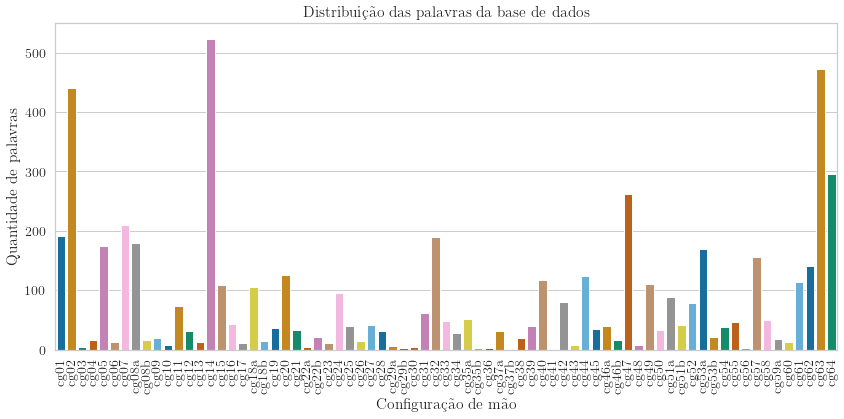

In [12]:
fig = plt.gcf()
fig.set_size_inches(14, 6)


ax = sns.barplot(x='CM', y='palavra', data=countCM, palette='colorblind')
ax.set(ylabel="Quantidade de palavras", xlabel="Configuração de mão", 
       title="Distribuição das palavras da base de dados")
ax.set_xticklabels(countCM['CM'], rotation=90)
fig.savefig('barplot_quantity_cm.eps', format='eps', dpi=1200, bbox_inches = 'tight')

In [13]:
def replaceClass(cg):
    quantity = count[cg]
    if (quantity <= threshold):
        return 'others'
    else: 
        return cg

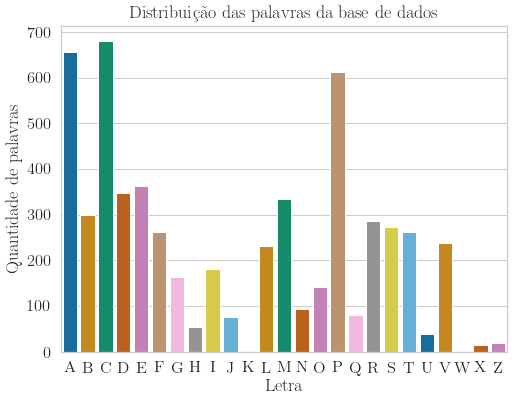

In [19]:
fig = plt.gcf()
fig.set_size_inches(8, 6)


ax = sns.barplot(x=countLetters.index, y=countLetters['palavra'], data=countLetters, palette='colorblind')
ax.set(ylabel="Quantidade de palavras", xlabel="Letra", title="Distribuição das palavras da base de dados")

fig.savefig('barplot_quantity_letter.eps', format='eps', dpi=1200, bbox_inches = 'tight')

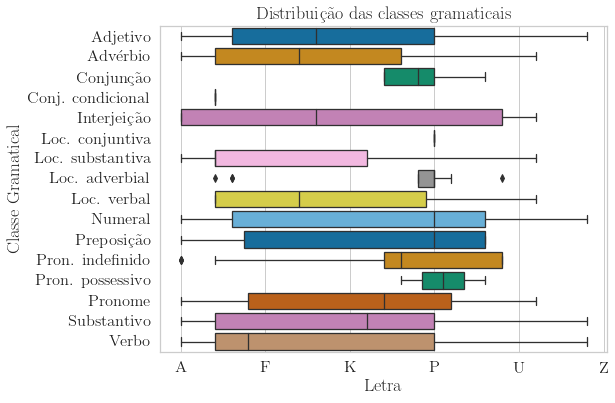

In [20]:
vis = vis_csv.copy()
vis = vis.sort_values(by='classe_gramatical')

sns.set(font_scale=1.5, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})

fig = plt.gcf()
fig.set_size_inches(8, 6)

ax = sns.boxplot(data=vis, y="classe_gramatical", x=vis['letra'].cat.codes, 
                 orient="h", palette="colorblind", linewidth=1.3)

letters = vis_csv['letra'].unique()
labels = [letters[1], letters[0], letters[5],
          letters[10], letters[15],
          letters[20], letters[24]]

ylabels = ['Adjetivo', 'Advérbio', 'Conjunção', 'Conj. condicional', 'Interjeição', 'Loc. conjuntiva',
           'Loc. substantiva', 'Loc. adverbial', 'Loc. verbal', 'Numeral', 'Preposição', 'Pron. indefinido',
           'Pron. possessivo', 'Pronome', 'Substantivo', 'Verbo']

ax.set_xticklabels(labels)
ax.set_yticklabels(ylabels)
ax.set(ylabel="Classe Gramatical", xlabel="Letra", 
       title="Distribuição das classes gramaticais")

fig.savefig('boxplot_class_letter.eps', format='eps', dpi=1200, bbox_inches = 'tight')

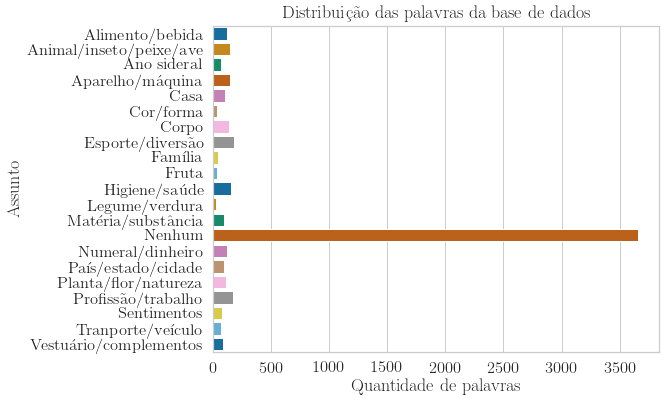

In [21]:
sns.set(font_scale=1.5, 
        font='Computer Modern Sans serif', 
        style="whitegrid", 
        rc={'text.usetex' : True})
fig = plt.gcf()
fig.set_size_inches(8, 6)


ax = sns.barplot(y=countS.index, x=countS['palavra'], data=countS, palette='colorblind', orient='h')
ax.set(ylabel="Assunto", xlabel="Quantidade de palavras", title="Distribuição das palavras da base de dados")

fig.savefig('barplot_quantity_subject.eps', format='eps', dpi=1200, bbox_inches = 'tight')